In [29]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [30]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
img_height = img_width = 299

train_generator = training_datagen.flow_from_directory(
    'workspace/images/rps',
    target_size=(img_height,img_width),
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    'workspace/images/rps-test-set',
    target_size=(img_height,img_width),
    class_mode='categorical')

# test_generator = test_datagen.flow_from_directory(
#     'workspace/catdog-images/test',
#     target_size=(img_height,img_width),
#     class_mode='binary')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [57]:
#MobileNet
pretrained_model = tf.keras.applications.InceptionV3(
    input_shape=(299,299,3),
    include_top=True
    )

pretrained_model.trainable = False

# pretrained_model.summary()

base_inputs = pretrained_model.layers[0].input
base_outputs = pretrained_model.layers[-2].output
x = tf.keras.layers.Dense(64, activation='relu')(base_outputs)
x = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs=base_inputs, outputs=x)

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
    tf.keras.metrics.AUC(name="auc"),
]

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=["accuracy"],
)
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
___________________________________________________________________________________________

In [58]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1
)
# model.evaluate(test_generator, verbose=1)

Epoch 1/5
79/79 [==============================] - 51s 558ms/step - loss: 0.3601 - accuracy: 0.8631 - val_loss: 0.9162 - val_accuracy: 0.6801
Epoch 2/5
79/79 [==============================] - 38s 479ms/step - loss: 0.1082 - accuracy: 0.9698 - val_loss: 0.5553 - val_accuracy: 0.7984
Epoch 3/5
79/79 [==============================] - 36s 455ms/step - loss: 0.0749 - accuracy: 0.9802 - val_loss: 0.6303 - val_accuracy: 0.8360
Epoch 4/5
79/79 [==============================] - 36s 457ms/step - loss: 0.0573 - accuracy: 0.9802 - val_loss: 0.5985 - val_accuracy: 0.8468
Epoch 5/5
79/79 [==============================] - 36s 451ms/step - loss: 0.0486 - accuracy: 0.9853 - val_loss: 1.2454 - val_accuracy: 0.7446


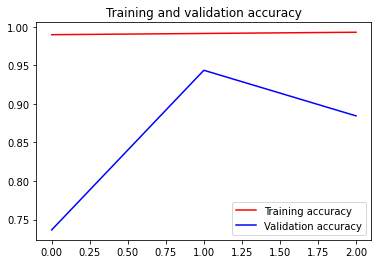

<Figure size 432x288 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

[[9.9999988e-01 4.5885167e-09 7.5311398e-08]]


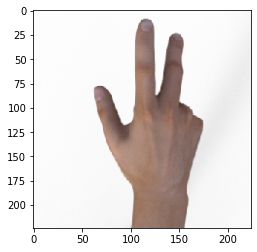

In [28]:
# model = load_model('./rps.h5')

path = os.path.join('workspace', 'images', 'rps', 'scissors', 'scissors03-005.png')
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classess = model.predict(images)
predict=model.predict(images) 
classes=np.argmax(predict,axis=1)

# p = train_generator.class_indices
# print(p)
plt.imshow(img)
print(classess)